In [232]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spatial

In [233]:
n_p = 2000
data = np.random.random(size=(n_p,2))

data = np.loadtxt("../../Downloads/TracingTheCosmicWeb_PublicData/fof_catalog_200Mpc512.txt", skiprows=3)
data = data[:n_p,[1,2]]

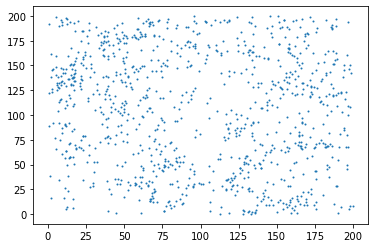

In [223]:
plt.scatter(data[:,0], data[:,1], s=1.0)

In [224]:
n_r = np.shape(data)[0]
data_random = np.random.random(size=(n_r,2))*200

points = np.vstack([data, data_random])
np.shape(points)

(2000, 2)

In [234]:
tri = spatial.Delaunay(points)

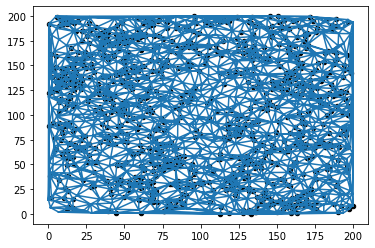

In [226]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.scatter(points[:n_p,0], points[:n_p,1], color='black', s=20)

In [227]:
pairs = []
for simplex in tri.simplices:
    a = simplex[0]
    b = simplex[1]
    c = simplex[2]
    if ([a,b] not in pairs) and ([b,a] not in pairs):
        pairs.append([a,b])
    if ([b,c] not in pairs) and ([c,b] not in pairs):
        pairs.append([b,c])
    if ([a,c] not in pairs) and ([c,a] not in pairs):
        pairs.append([a,c])

In [228]:
n_to_random = np.zeros(n_p+n_r)
n_to_data = np.zeros(n_p+n_r)

for p in pairs:
    a = p[0]
    b = p[1]
    a_is_data = True
    b_is_data = True
    if a>n_p:
        a_is_data = False
    if b>n_p:
        b_is_data = False
        
    if a_is_data:
        n_to_data[b] +=1 
    else:
        n_to_random[b] +=1
    
    if b_is_data:
        n_to_data[a] +=1 
    else:
        n_to_random[a] +=1

In [229]:
is_void = (n_to_data==0)
is_peak = (n_to_random==0)
is_filament = (n_to_data>n_to_random) & (~is_peak)
is_sheet = (~is_void) & (~is_peak) & (~is_filament)

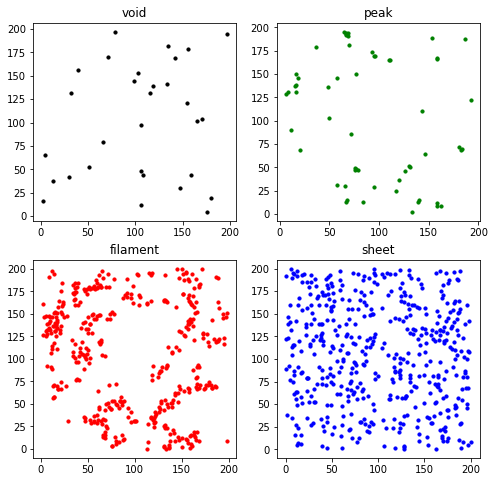

In [230]:
is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(points[is_data&is_void,0], points[is_data&is_void,1], color='black', s=10)
plt.title('void')

plt.subplot(2,2,2)
plt.scatter(points[is_data&is_peak,0], points[is_data&is_peak,1], color='green', s=10)
plt.title('peak')

plt.subplot(2,2,3)
plt.scatter(points[is_data&is_filament,0], points[is_data&is_filament,1], color='red', s=10)
plt.title('filament')

plt.subplot(2,2,4)
plt.title('sheet')
plt.scatter(points[is_data&is_sheet,0], points[is_data&is_sheet,1], color='blue', s=10)

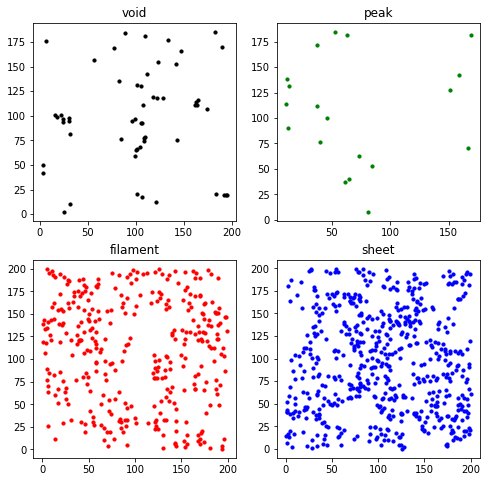

In [231]:
is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(points[is_random&is_void,0], points[is_random&is_void,1], color='black', s=10)
plt.title('void')

plt.subplot(2,2,2)
plt.scatter(points[is_random&is_peak,0], points[is_random&is_peak,1], color='green', s=10)
plt.title('peak')

plt.subplot(2,2,3)
plt.scatter(points[is_random&is_filament,0], points[is_random&is_filament,1], color='red', s=10)
plt.title('filament')

plt.subplot(2,2,4)
plt.title('sheet')
plt.scatter(points[is_random&is_sheet,0], points[is_random&is_sheet,1], color='blue', s=10)